In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn.model_selection as sms
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

#import sklearn as skl

def set_graph_size(width=8, height=6):
  """Установка размеров изображения"""
  plt.rcParams["figure.figsize"] = width, height

In [2]:
#1
boston_dataframe = pd.DataFrame(pd.read_csv('boston.csv'))

In [3]:
#2-3

boston_dataframe.head()

boston_dataframe.info()

#У всех данных тип - float64 (числовой), пропущенных значений вроде нет

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [4]:
#4
boston_dataframe.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<Axes: >

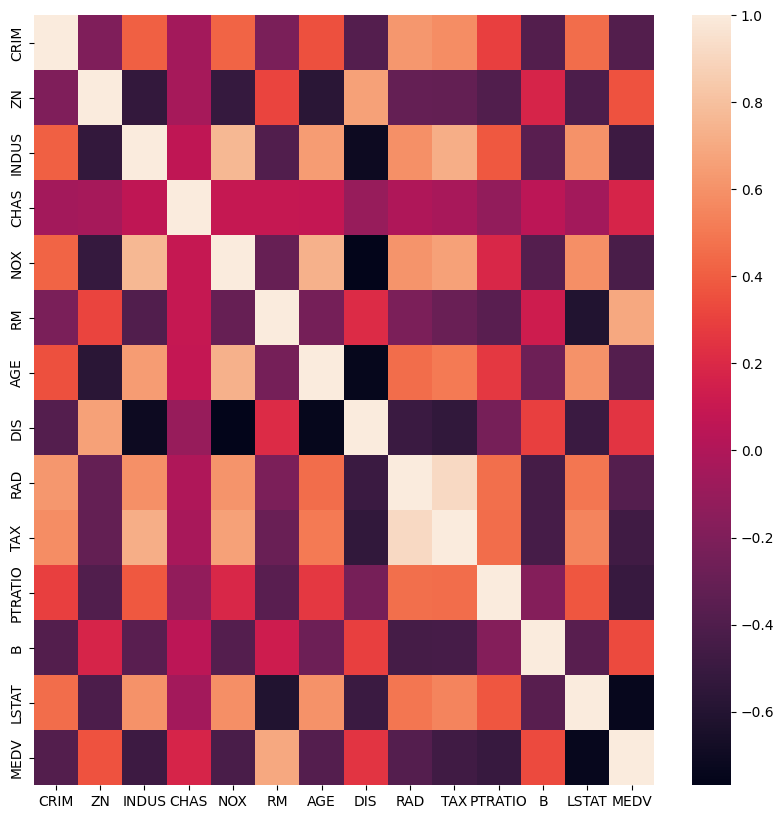

In [5]:
#5
plt.figure(figsize=(10,10))
sns.heatmap(boston_dataframe.corr())

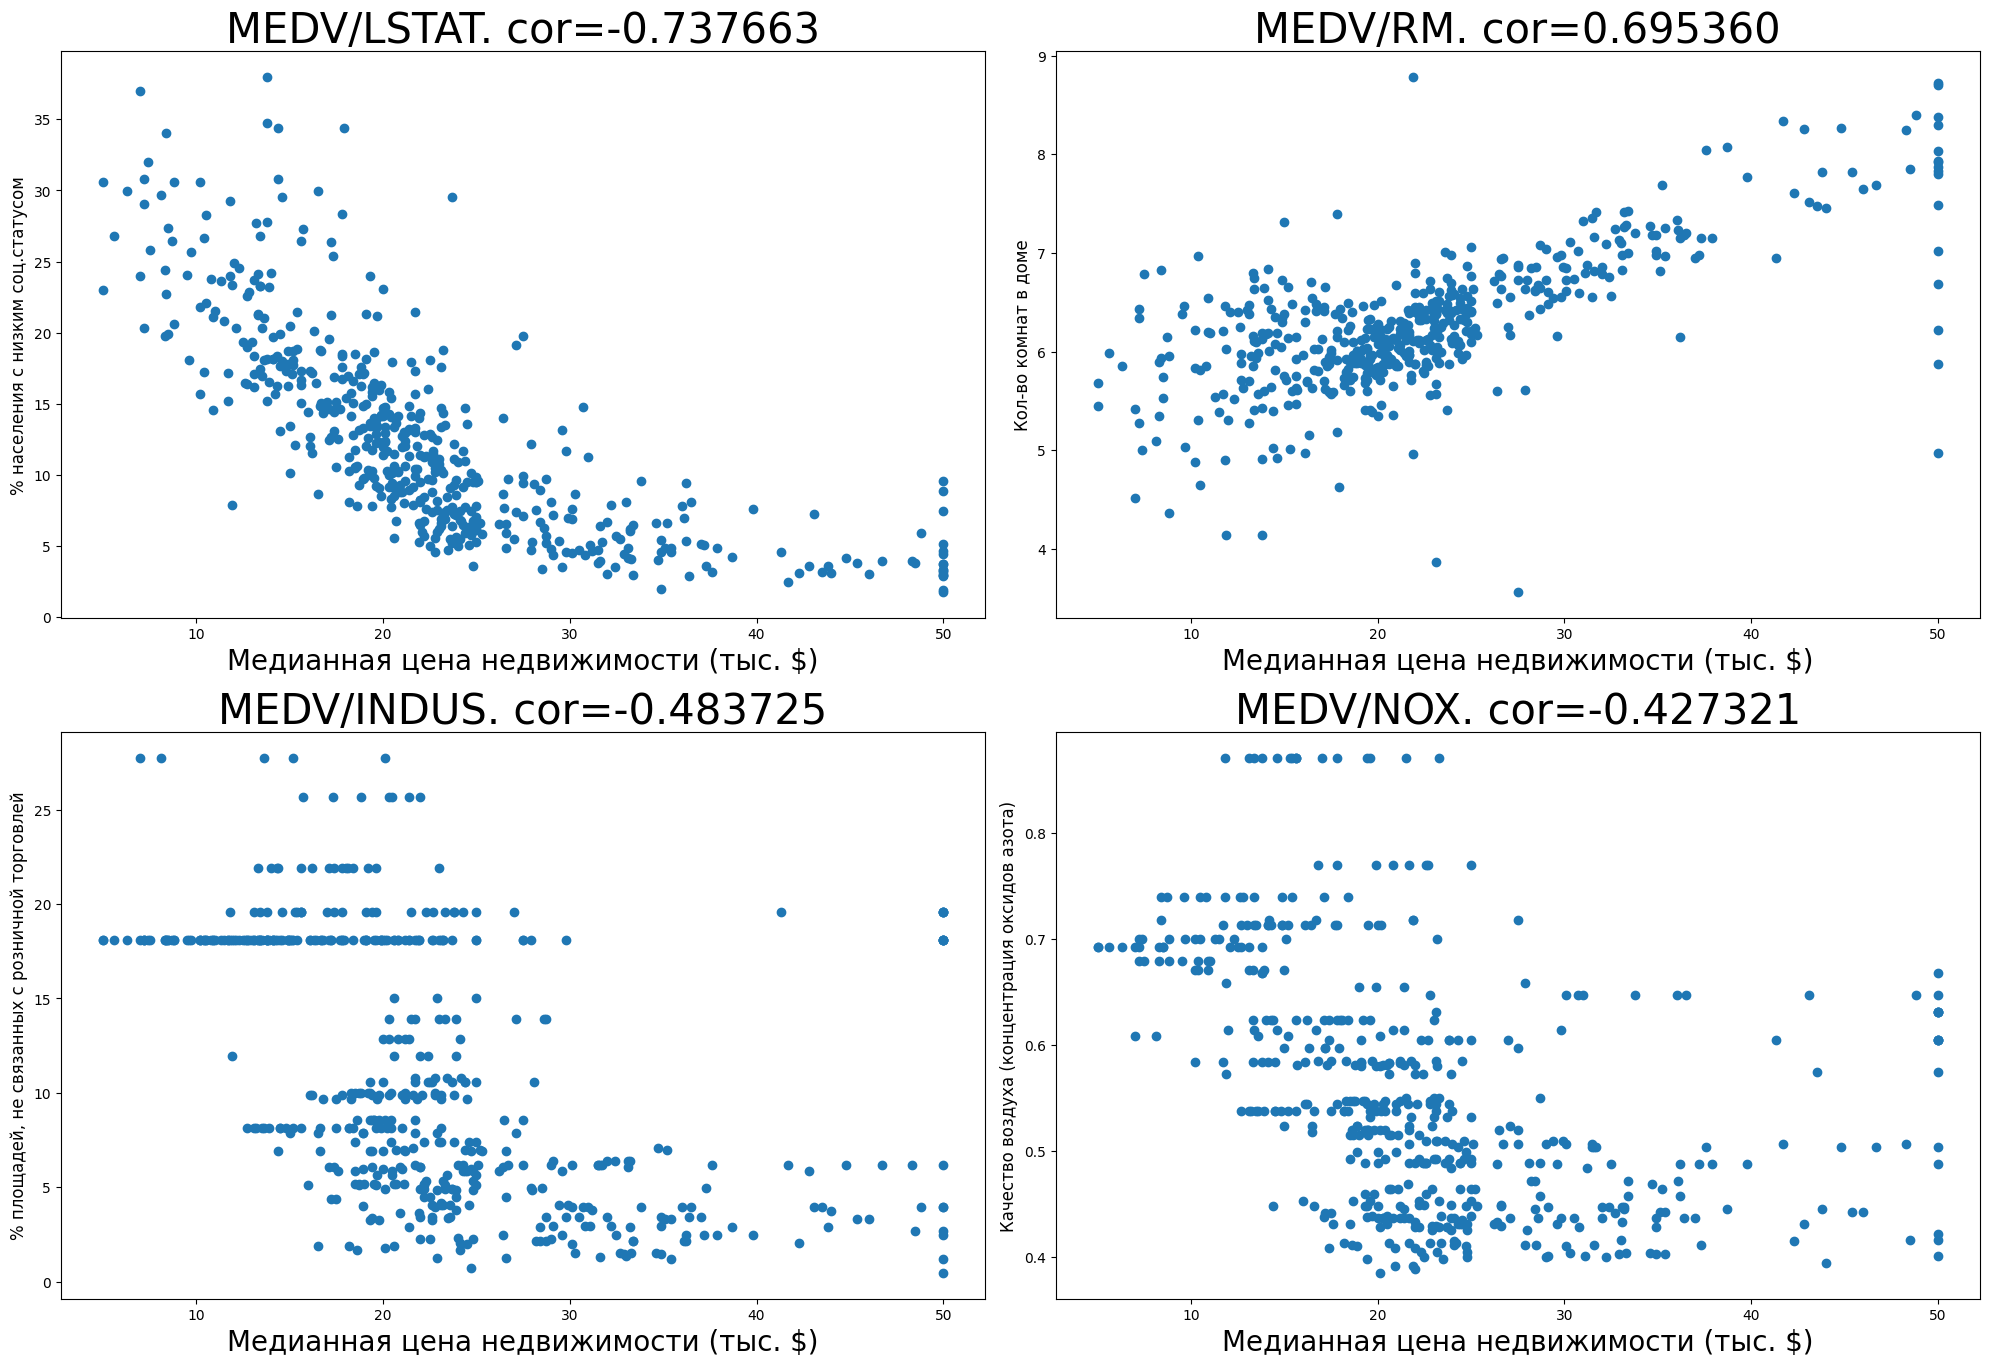

In [6]:
set_graph_size(20,20)

#-0.737663
plt.subplot(3,2,1)
plt.scatter(x='MEDV', y='LSTAT',
            data=boston_dataframe)
plt.title('MEDV/LSTAT. cor=-0.737663', fontsize=30)
plt.xlabel('Медианная цена недвижимости (тыс. $)', fontsize=20)
plt.ylabel('% населения с низким соц.статусом', fontsize=12)

""" #-0.507787
plt.subplot(3,2,2)
plt.scatter(x='MEDV', y='PTRATIO',
            data=boston_dataframe)
plt.title('MEDV/PTRATIO. cor=-0.507787', fontsize=30)
plt.xlabel('Медианная цена недвижимости (тыс. $)', fontsize=20)
plt.ylabel('Соотношение кол-ва учеников и учителей', fontsize=12) """

#0.695360
plt.subplot(3,2,2)
plt.scatter(x='MEDV', y='RM',
            data=boston_dataframe)
plt.title('MEDV/RM. cor=0.695360', fontsize=30)
plt.xlabel('Медианная цена недвижимости (тыс. $)', fontsize=20)
plt.ylabel('Кол-во комнат в доме', fontsize=12)

#-0.483725
plt.subplot(3,2,3)
plt.scatter(x='MEDV', y='INDUS',
            data=boston_dataframe)
plt.title('MEDV/INDUS. cor=-0.483725', fontsize=30)
plt.xlabel('Медианная цена недвижимости (тыс. $)', fontsize=20)
plt.ylabel('% площадей, не связанных с розничной торговлей', fontsize=12)

""" #-0.468536
plt.subplot(3,2,5)
plt.scatter(x='MEDV', y='TAX',
            data=boston_dataframe)
plt.title('MEDV/TAX. cor=-0.468536', fontsize=30)
plt.xlabel('Медианная цена недвижимости (тыс. $)', fontsize=20)
plt.ylabel('Налоги (ставка налога на 10 000 долларов США)', fontsize=12) """

#-0.427321
plt.subplot(3,2,4)
plt.scatter(x='MEDV', y='NOX',
            data=boston_dataframe)
plt.title('MEDV/NOX. cor=-0.427321', fontsize=30)
plt.xlabel('Медианная цена недвижимости (тыс. $)', fontsize=20)
plt.ylabel('Качество воздуха (концентрация оксидов азота)', fontsize=12)

plt.tight_layout()


In [7]:
# Используем для стандартизации значений, поскольку у нас есть большой разброс по значениям, а также мы измеряем в разных единицах измерения
scaler = StandardScaler()

factors_array = pd.DataFrame({'LSTAT': boston_dataframe['LSTAT'], 
                            'RM': boston_dataframe['RM'], 
                            'INDUS': boston_dataframe['INDUS'], 
                            'NOX': boston_dataframe['NOX']})
display(boston_dataframe['MEDV'])
display(factors_array)
factors_array = scaler.fit_transform(factors_array)

target_array = pd.DataFrame({'MEDV': boston_dataframe['MEDV']})
target_array = scaler.fit_transform(target_array)

display(factors_array)
display(target_array)

# заданный random_state обеспечивает воспроизводимость разделения при разных запусках
target_train, target_test, factors_train, factors_test = sms.train_test_split(factors_array, target_array, test_size = 0.2, random_state=42)

""" display(target_train)
display(target_test)
display(factors_train)
display(factors_test) """

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

,LSTAT,RM,INDUS,NOX
0,4.98,6.575,2.31,0.538
1,9.14,6.421,7.07,0.469
2,4.03,7.185,7.07,0.469
3,2.94,6.998,2.18,0.458
4,5.33,7.147,2.18,0.458
...,...,...,...,...
501,9.67,6.593,11.93,0.573
502,9.08,6.120,11.93,0.573
503,5.64,6.976,11.93,0.573
504,6.48,6.794,11.93,0.573


array([[-1.0755623 ,  0.41367189, -1.2879095 , -0.14421743],
       [-0.49243937,  0.19427445, -0.59338101, -0.74026221],
       [-1.2087274 ,  1.28271368, -0.59338101, -0.74026221],
       ...,
       [-0.98304761,  0.98496002,  0.11573841,  0.15812412],
       [-0.86530163,  0.72567214,  0.11573841,  0.15812412],
       [-0.66905833, -0.36276709,  0.11573841,  0.15812412]],
      shape=(506, 4))

array([[ 0.15968566],
       [-0.10152429],
       [ 1.32424667],
       [ 1.18275795],
       [ 1.48750288],
       [ 0.6712218 ],
       [ 0.03996443],
       [ 0.49708184],
       [-0.65659542],
       [-0.39538548],
       [-0.81985164],
       [-0.39538548],
       [-0.09064054],
       [-0.23212926],
       [-0.47157171],
       [-0.286548  ],
       [ 0.06173193],
       [-0.54775795],
       [-0.25389676],
       [-0.47157171],
       [-0.97222411],
       [-0.31919924],
       [-0.79808414],
       [-0.87427038],
       [-0.75454915],
       [-0.93957286],
       [-0.64571167],
       [-0.84161913],
       [-0.44980422],
       [-0.16682677],
       [-1.07017784],
       [-0.87427038],
       [-1.0157591 ],
       [-1.02664285],
       [-0.98310786],
       [-0.39538548],
       [-0.27566425],
       [-0.16682677],
       [ 0.23587189],
       [ 0.89978051],
       [ 1.34601416],
       [ 0.4426631 ],
       [ 0.30117438],
       [ 0.23587189],
       [-0.14505928],
       [-0

' display(target_train)\ndisplay(target_test)\ndisplay(factors_train)\ndisplay(factors_test) '

In [ ]:

lin_reg_model = LinearRegression()
lin_reg_model.fit(target_train, factors_train)

print(f"Coefficient (slope): {lin_reg_model.coef_}")
print(f"Intercept: {lin_reg_model.intercept_}")



Coefficient (slope): [[-0.4813154   0.41500579 -0.02958646  0.01103515]]
Intercept: [-0.00380653]
